In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import folium
from folium.plugins import MarkerCluster

warnings.filterwarnings('ignore')


plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [44]:
df = pd.read_csv('./data/설비마스터.csv', thousands=',')
df['설비그룹'] = df['설비그룹'].fillna('-')
# df = df[['사용부서', '설비범주', '설비그룹', '설비코드', '설비내역', '설비등급', '계획자그룹', '주작업장',
#        '책임코스트센터', '취득일', '취득가액', '자산', '가동\n시간','작업인원', '에너지(연간사용금액)','Unnamed: 28']][1:]
df = df[['사용부서', '설비범주', '설비그룹', '설비코드', '설비내역', '설비등급', '계획자그룹', '주작업장',
       '책임코스트센터', '취득가액', '자산', '가동\n시간','위도','경도','작업인원', '에너지(연간사용금액)','Unnamed: 28']][1:]

df.columns = ['사용부서', '설비범주', '설비그룹', '설비코드', '설비내역', '설비등급', '계획자그룹', '주작업장', '책임코스트센터', '취득가액', '자산', '가동\n시간','위도','경도','작업인원', '에너지(연간사용금액)','위치']
df['에너지(연간사용금액)'] = df['에너지(연간사용금액)'].apply(lambda x : float(str(x).replace(',', '')))
# df.style.format(thousands=',')
# df.head()

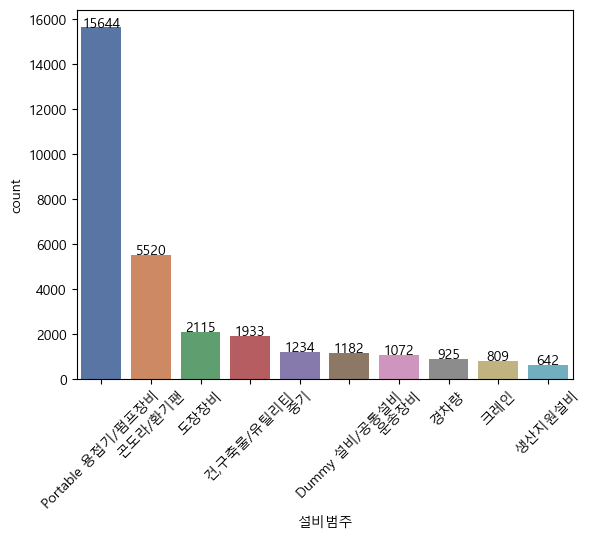

In [3]:
tmpl = pd.DataFrame(df['설비범주'].value_counts()).reset_index().sort_values('count', ascending=False)[:10]
ax = sns.barplot(data = tmpl, x='설비범주', y='count', palette = 'deep')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') # 가운데 정렬
plt.xticks(rotation=45)
plt.show()

In [4]:
# pd.DataFrame(df['설비범주'].value_counts()).reset_index().sort_values(by='설비범주').to_csv('./data/설비범주.csv', index=False, encoding='cp949')
# df.pivot_table(index=['설비범주', '설비그룹'],  values='사용부서', aggfunc='count').to_csv('./data/test3.csv', encoding='cp949')
# df.pivot_table(index=['설비범주', '설비그룹'], values='설비내역', aggfunc='count').to_csv('./data/전체설비현황2.csv', encoding='cp949')

In [5]:
df['사용부서'] = df['사용부서'].apply(lambda x : x.split(':')[1].strip())
df_crane = df[df['설비범주'] == '크레인']
df_crane['설비그룹'] = df_crane['설비그룹'].apply(lambda x : 'JIB 크레인' if x == 'JIB 크레인(200톤 이상)' else x)
df_crane['설비그룹'] = df_crane['설비그룹'].apply(lambda x : 'TOWER 크레인' if x == '주행식 타워크레인' else x)
print("크레인 개수 : {}개".format(len(df_crane)))
# df_crane.head()

df_heavy = df[df['설비범주']=='중기']
print("중기 개수 : {}개".format(len(df_heavy)))

크레인 개수 : 809개
중기 개수 : 1234개


In [6]:
df_crane

,사용부서,설비범주,설비그룹,설비코드,설비내역,설비등급,계획자그룹,주작업장,책임코스트센터,취득가액,자산,가동\n시간,위도,경도,작업인원,에너지(연간사용금액),위치
2147,특수선생산지원팀,크레인,JIB 크레인,CCC0001,JIB CRANE(200TON) CC-01,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.258854e+09,41500018.0,12.0,34.877822,128.697691,0.0,"50,183,040",특수선
2148,장비운영팀,크레인,JIB 크레인,CCC0002,JIB CRANE(200TON) CC-02,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.187125e+09,41500017.0,12.0,34.872235,128.696923,0.0,"39,761,280",No.1dock(동중)
2149,가공팀,크레인,오버헤드 훅 크레인,CEC0023,GANTRY CRANE(3TON) C-23,B-C01,P33 : 크레인 정비직,M8320_Z1 : PM-크레인보전파트 협력사,5460 : 장비보전팀,NaN,41500243.0,12.0,0.000000,0.000000,0.0,0,SSY-러그제작장
2150,조립1팀,크레인,오버헤드 훅 크레인,CEC0025,HOOK CRANE(C025),B-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,NaN,41500113.0,12.0,0.000000,0.000000,0.0,0,T-bar 제작공장(다목적샵 4Bay)
2151,조립2팀,크레인,오버헤드 훅 크레인,CEC0026,HOOK CRANE(C026),B-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,NaN,41500245.0,24.0,0.000000,0.000000,0.0,0,3DS-1bay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,장비보전팀,크레인,권선수리 Dummy,CWD0001,모터 권선수리,Z-Z02,P74 : 종합정비반,M8320_35 : PM-종합정비반,5460 : 장비보전팀,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2952,공무기능 자체유지보,크레인,선불출 Dummy,CZAZT2028,코스트출고오더_T2028 (크레인기계1반),Z-Z02,P34 : 크레인기계1반,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2953,공무기능 자체유지보,크레인,선불출 Dummy,CZBZT2028,코스트출고오더_T2028 (크레인전기1반),Z-Z02,P36 : 크레인전기1반,M8320_23 : PM-크레인보전2반,5460 : 장비보전팀,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2954,공무기능 자체유지보,크레인,선불출 Dummy,CZCZT2028,코스트출고오더_T2028 (크레인기계2반),Z-Z02,P35 : 크레인기계2반,M8320_22 : PM-크레인기계2반,5460 : 장비보전팀,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


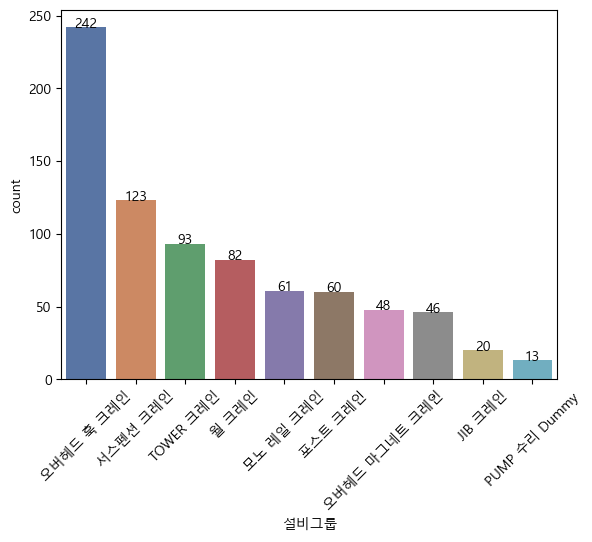

In [7]:
tmpl = pd.DataFrame(df_crane['설비그룹'].value_counts()).reset_index().sort_values('count', ascending=False)[:10]
ax = sns.barplot(data = tmpl, x='설비그룹', y='count', palette = 'deep')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') # 가운데 정렬
plt.xticks(rotation=45)
plt.show()

In [9]:
# df_crane['설비그룹'].value_counts().to_csv('./data/cranetest.csv', encoding='cp949')

In [102]:
crane_list = ['TOWER 크레인', 'JIB 크레인', '골리아스 크레인', '해상크레인', 'JIB 크레인(200톤 이상)']
heavy_list = ['타이어 크레인', '크롤라크레인', '지게차', '전동지게차']

tower_crane = df_crane[df_crane['설비그룹'] == crane_list[0]]
jib_crane = df_crane[df_crane['설비그룹'].isin(['JIB 크레인', 'JIB 크레인(200톤 이상)'])]
goliath_crane = df_crane[df_crane['설비그룹'] == crane_list[2]]
sea_crane = df_crane[df_crane['설비그룹'] == crane_list[3]]
other_crane = df_crane[df_crane['설비그룹'].isin(crane_list) == False]

In [103]:
df_crane_locate = df_crane[(df_crane['위도'] != 0) & (df_crane['위도'].isna() == False)]
df_crane_locate

,사용부서,설비범주,설비그룹,설비코드,설비내역,설비등급,계획자그룹,주작업장,책임코스트센터,취득가액,자산,가동\n시간,위도,경도,작업인원,에너지(연간사용금액),위치
2147,특수선생산지원팀,크레인,JIB 크레인,CCC0001,JIB CRANE(200TON) CC-01,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.258854e+09,41500018.0,12.0,34.877822,128.697691,0.0,"50,183,040",특수선
2148,장비운영팀,크레인,JIB 크레인,CCC0002,JIB CRANE(200TON) CC-02,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.187125e+09,41500017.0,12.0,34.872235,128.696923,0.0,"39,761,280",No.1dock(동중)
2196,조립2팀,크레인,오버헤드 훅 크레인,CEC0082,HOOK CRANE(C082),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.587854e+08,41500040.0,24.0,34.869017,128.699343,0.0,"26,802,048",3DS-1bay
2197,조립2팀,크레인,오버헤드 훅 크레인,CEC0084,HOOK CRANE(C084),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,9.731455e+08,41500032.0,24.0,34.868893,128.698564,0.0,"52,278,720",3DS-2bay
2199,조립1팀,크레인,오버헤드 훅 크레인,CEC0091,HOOK CRANE(C091),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.613461e+08,41500033.0,24.0,34.870443,128.700145,0.0,"33,237,485",PBS-3 bay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,장비운영팀,크레인,TOWER 크레인,CTT0021,TRAVELLING TOWER CRANE(100TON) TTC-21,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,6.126928e+09,41500678.0,12.0,34.878096,128.703594,0.0,"75,251,904",C안벽(북)
2863,장비운영팀,크레인,TOWER 크레인,CTT0022,TRAVELLING TOWER CRANE(60TON) TTC-22,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,4.194448e+09,41500683.0,12.0,34.882705,128.721500,0.0,"35,534,803",느태 PE장 (남)
2864,장비운영팀,크레인,TOWER 크레인,CTT0023,TRAVELLING TOWER CRANE(100TON) TTC-23,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,5.616511e+09,41500684.0,12.0,34.884237,128.721892,0.0,"35,534,803",느태 PE장 (북서)
2865,장비운영팀,크레인,TOWER 크레인,CTT0024,TRAVELLING TOWER CRANE(60TON) TTC-24,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,4.725407e+09,41500778.0,12.0,34.882891,128.723780,0.0,"43,428,154",느태 PE장 (북동)


In [104]:
df_crane_locate['설비그룹'].value_counts()

설비그룹
TOWER 크레인        26
JIB 크레인          17
오버헤드 훅 크레인       17
오버헤드 마그네트 크레인    17
골리아스 크레인          4
하역 크레인            1
Name: count, dtype: int64

In [105]:
# latitude = 34.869316212477095
# longitude = 128.70022665654605

# def color_select(row):
#     if row =='골리아스 크레인':
#         return 'red'
#     elif row =='주행식 타워크레인':
#         return 'blue'
#     elif row =='오버헤드 훅 크레인':
#         return 'green'
#     elif row =='오버헤드 마그네트 크레인':
#         return 'purple'
#     elif row =='TOWER 크레인':
#         return 'orange'
#     elif row =='하역 크레인':
#         return 'pink'
#     else :
#         return 'white'


# tiles = "http://mt0.google.com/vt/lyrs=s&hl=ko&x={x}&y={y}&z={z}"
# # tiles = "http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}"
# attr = "Google"

# m = folium.Map(
#     location=[latitude, longitude],
#     zoom_start=16,
#     tiles=tiles,
#     attr=attr
# )

# for lat, long, c in zip(df_crane_locate['위도'], df_crane_locate['경도'], df_crane_locate['설비그룹']):
#     folium.Circle(radius=35, location=[lat, long], color=color_select(c),         fill=True,  # 내부 채우기
#         fill_color=color_select(c),  # 채우기 색상 설정
#         fill_opacity=0.7,  # 채우기 색상 불투명도 (0.0 ~ 1.0)
#         weight=2,  # 외곽선 두께
#         opacity=1.0 ).add_to(m)

# legend_html = '''
# <div style="
#     position: fixed; 
#     bottom: 50px; left: 50px; width: 230px; height: 170px; 
#     background-color: white; z-index:9999; font-size:14px;
#     border:2px solid grey; border-radius:5px;
#     padding: 10px;">
#     <i style="background:red; border-radius: 50%; border: 2px solid black; width: 12px; height: 12px; display: inline-block;"></i> <span style="font-weight: bold;">: 골리앗 크레인<br>
#     <i style="background:blue; border-radius: 50%; border: 2px solid black; width: 12px; height: 12px; display: inline-block;"></i> : 주행식 크레인<br>
#     <i style="background:green; border-radius: 50%; border: 2px solid black; width: 12px; height: 12px; display: inline-block;"></i> : 오버헤드 훅 크레인<br>
#     <i style="background:purple; border-radius: 50%; border: 2px solid black; width: 12px; height: 12px; display: inline-block;"></i> : 오버헤드 마그네트 크레인<br>
#     <i style="background:orange; border-radius: 50%; border: 2px solid black; width: 12px; height: 12px; display: inline-block;"></i> : 타워크레인<br>
#     <i style="background:pink; border-radius: 50%; border: 2px solid black; width: 12px; height: 12px; display: inline-block;"></i> : 하역크레인<br>
#     <i style="background:white; border-radius: 50%; border: 2px solid black; width: 12px; height: 12px; display: inline-block;"></i> : JIB 크레인<br>
# </div>
# '''

# m.get_root().html.add_child(folium.Element(legend_html))

# m

In [106]:
def f1(x):
    if not isinstance(x, str):
        return None
    
    x = x.lower()

    keyword_내업 = ['bay', '셀터', '공장', '센터', '환기', '실', 'cell', 'shop', 'nps', 'pbs', '3ds', 'pas', 'cas', 'cts', 'gbs']
    for k in keyword_내업:
        if k in x:
            return '내업'
        
    keyword_SSY = ['ssy']
    for k in keyword_SSY:
        if k in x:
            return 'SSY'
        
    keyword_1DOCK = ['no.1', '1도크', 'a안벽', 'b안벽', 'rd-5', 'a-7', '1dock']
    for k in keyword_1DOCK:
        if k in x:
            return '1DOCK'
        
    keyword_2DOCK = ['no.2', '2도크', 'c안벽', 'd안벽', 'rd-3', 'rd-4', '모듈 shop', '2dock']
    for k in keyword_2DOCK:
        if k in x:
            return '2DOCK'

    keyword_GBS = ['GBS-옥외', 'GBS옥외']
    for k in keyword_GBS:
        if k in x:
            return 'GBS 주변'
        
    keyword_E = ['e안벽', 'e1안벽', 'e2안벽', 'e3안벽', 'e-1', 'e-2', 'e-3', 'e-4', 'lngc', 'e센터']
    for k in keyword_E:
        if k in x:
            return 'E안벽 구역(해양제작공장)'
        
    keyword_느태 = ['느태', 'g안벽', 'g1안벽', 'g2안벽', 'g3안벽', 'g-1', 'g-2', 'g-3','gc-3', 'gc-5', 'g3']
    for k in keyword_느태:
        if k in x:
            return '느태(H/Z) 구역 (G1도장~G3 PE장)'

    keyword_H = ['h안벽']
    for k in keyword_H:
        if k in x:
            return 'H안벽'
        
    keyword_etc = ['n안벽', 'n 안벽','특수선', 'GRP', '잠수함']
    for k in keyword_etc:
        if k in x:
            return '특수선'
        
    if '옥포해상' in x:
        return '옥포해상'

    return None  # 모든 조건에 해당하지 않는 경우

In [107]:
df_위치 = df_crane[df_crane['위치'].notna()].copy()
df_위치['구역'] = None
# 설비그룹이 '오버헤드 훅 크레인'인 경우 '내업'으로 설정
df_위치.loc[df_위치['설비그룹'] == '오버헤드 훅 크레인', '구역'] = '내업'
# 위치에 따른 구역 설정
df_위치['구역'] = df_위치.apply(lambda row: f1(row['위치']) if row['구역'] is None else row['구역'], axis=1)
df_위치['구역'] = df_위치['구역'].fillna('내업')
df_위치

,사용부서,설비범주,설비그룹,설비코드,설비내역,설비등급,계획자그룹,주작업장,책임코스트센터,취득가액,자산,가동\n시간,위도,경도,작업인원,에너지(연간사용금액),위치,구역
2147,특수선생산지원팀,크레인,JIB 크레인,CCC0001,JIB CRANE(200TON) CC-01,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.258854e+09,41500018.0,12.0,34.877822,128.697691,0.0,"50,183,040",특수선,특수선
2148,장비운영팀,크레인,JIB 크레인,CCC0002,JIB CRANE(200TON) CC-02,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.187125e+09,41500017.0,12.0,34.872235,128.696923,0.0,"39,761,280",No.1dock(동중),1DOCK
2149,가공팀,크레인,오버헤드 훅 크레인,CEC0023,GANTRY CRANE(3TON) C-23,B-C01,P33 : 크레인 정비직,M8320_Z1 : PM-크레인보전파트 협력사,5460 : 장비보전팀,NaN,41500243.0,12.0,0.000000,0.000000,0.0,0,SSY-러그제작장,내업
2150,조립1팀,크레인,오버헤드 훅 크레인,CEC0025,HOOK CRANE(C025),B-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,NaN,41500113.0,12.0,0.000000,0.000000,0.0,0,T-bar 제작공장(다목적샵 4Bay),내업
2151,조립2팀,크레인,오버헤드 훅 크레인,CEC0026,HOOK CRANE(C026),B-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,NaN,41500245.0,24.0,0.000000,0.000000,0.0,0,3DS-1bay,내업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,조립2팀,크레인,월 크레인,CWC0683,WALL CRANE(C683),NaN,P33 : 크레인 정비직,M8320_Z1 : PM-크레인보전파트 협력사,5460 : 장비보전팀,1.228778e+06,41500820.0,NaN,0.000000,0.000000,0.0,0,조립2공장 2Bay 동편,내업
2946,LNGC생산팀,크레인,월 크레인,CWC0685,WALL CRANE(C685),NaN,P33 : 크레인 정비직,M8320_Z1 : PM-크레인보전파트 협력사,5460 : 장비보전팀,NaN,41500836.0,NaN,0.000000,0.000000,0.0,0,Pump Mast(E안벽),E안벽 구역(해양제작공장)
2947,LNGC생산팀,크레인,월 크레인,CWC0686,WALL CRANE(C686),NaN,P33 : 크레인 정비직,M8320_Z1 : PM-크레인보전파트 협력사,5460 : 장비보전팀,4.733300e+04,41500833.0,NaN,0.000000,0.000000,0.0,0,Pump Mast(E안벽),E안벽 구역(해양제작공장)
2948,LNGC생산팀,크레인,월 크레인,CWC0687,WALL CRANE(C687),NaN,P33 : 크레인 정비직,M8320_Z1 : PM-크레인보전파트 협력사,5460 : 장비보전팀,4.733300e+04,41500834.0,NaN,0.000000,0.000000,0.0,0,Pump Mast(E안벽),E안벽 구역(해양제작공장)


In [108]:
df_위치['설비그룹'].value_counts()

설비그룹
오버헤드 훅 크레인       228
서스펜션 크레인         119
월 크레인             81
TOWER 크레인         69
모노 레일 크레인         55
오버헤드 마그네트 크레인     46
포스트 크레인           41
JIB 크레인           17
골리아스 크레인           4
해상크레인              2
하역 크레인             1
Name: count, dtype: int64

In [111]:
# df_위치.pivot_table(index=['구역','설비그룹'], values='위치', aggfunc='count').to_csv('./data/크레인구역.csv', encoding='cp949')
# df_위치.pivot_table(index=['설비그룹','구역'], values='위치', aggfunc='count').to_csv('./data/크레인구역2.csv', encoding='cp949')

In [74]:
df_위치[df_위치['위도'] != 0]

,사용부서,설비범주,설비그룹,설비코드,설비내역,설비등급,계획자그룹,주작업장,책임코스트센터,취득가액,자산,가동\n시간,위도,경도,작업인원,에너지(연간사용금액),위치
2147,특수선생산지원팀,크레인,JIB 크레인,CCC0001,JIB CRANE(200TON) CC-01,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.258854e+09,41500018.0,12.0,34.877822,128.697691,0.0,"50,183,040",특수선
2148,장비운영팀,크레인,JIB 크레인,CCC0002,JIB CRANE(200TON) CC-02,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.187125e+09,41500017.0,12.0,34.872235,128.696923,0.0,"39,761,280",No.1dock(동중)
2196,조립2팀,크레인,오버헤드 훅 크레인,CEC0082,HOOK CRANE(C082),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.587854e+08,41500040.0,24.0,34.869017,128.699343,0.0,"26,802,048",3DS-1bay
2197,조립2팀,크레인,오버헤드 훅 크레인,CEC0084,HOOK CRANE(C084),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,9.731455e+08,41500032.0,24.0,34.868893,128.698564,0.0,"52,278,720",3DS-2bay
2199,조립1팀,크레인,오버헤드 훅 크레인,CEC0091,HOOK CRANE(C091),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.613461e+08,41500033.0,24.0,34.870443,128.700145,0.0,"33,237,485",PBS-3 bay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,장비운영팀,크레인,주행식 타워크레인,CTT0021,TRAVELLING TOWER CRANE(100TON) TTC-21,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,6.126928e+09,41500678.0,12.0,34.878096,128.703594,0.0,"75,251,904",C안벽(북)
2863,장비운영팀,크레인,주행식 타워크레인,CTT0022,TRAVELLING TOWER CRANE(60TON) TTC-22,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,4.194448e+09,41500683.0,12.0,34.882705,128.721500,0.0,"35,534,803",느태 PE장 (남)
2864,장비운영팀,크레인,주행식 타워크레인,CTT0023,TRAVELLING TOWER CRANE(100TON) TTC-23,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,5.616511e+09,41500684.0,12.0,34.884237,128.721892,0.0,"35,534,803",느태 PE장 (북서)
2865,장비운영팀,크레인,주행식 타워크레인,CTT0024,TRAVELLING TOWER CRANE(60TON) TTC-24,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,4.725407e+09,41500778.0,12.0,34.882891,128.723780,0.0,"43,428,154",느태 PE장 (북동)


In [68]:
df_crane_locate

,사용부서,설비범주,설비그룹,설비코드,설비내역,설비등급,계획자그룹,주작업장,책임코스트센터,취득가액,자산,가동\n시간,위도,경도,작업인원,에너지(연간사용금액),위치
2147,특수선생산지원팀,크레인,JIB 크레인,CCC0001,JIB CRANE(200TON) CC-01,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.258854e+09,41500018.0,12.0,34.877822,128.697691,0.0,"50,183,040",특수선
2148,장비운영팀,크레인,JIB 크레인,CCC0002,JIB CRANE(200TON) CC-02,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.187125e+09,41500017.0,12.0,34.872235,128.696923,0.0,"39,761,280",No.1dock(동중)
2196,조립2팀,크레인,오버헤드 훅 크레인,CEC0082,HOOK CRANE(C082),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,4.587854e+08,41500040.0,24.0,34.869017,128.699343,0.0,"26,802,048",3DS-1bay
2197,조립2팀,크레인,오버헤드 훅 크레인,CEC0084,HOOK CRANE(C084),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,9.731455e+08,41500032.0,24.0,34.868893,128.698564,0.0,"52,278,720",3DS-2bay
2199,조립1팀,크레인,오버헤드 훅 크레인,CEC0091,HOOK CRANE(C091),A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,3.613461e+08,41500033.0,24.0,34.870443,128.700145,0.0,"33,237,485",PBS-3 bay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,장비운영팀,크레인,주행식 타워크레인,CTT0021,TRAVELLING TOWER CRANE(100TON) TTC-21,A-C01,P33 : 크레인 정비직,M8320_21 : PM-크레인보전1반,5460 : 장비보전팀,6.126928e+09,41500678.0,12.0,34.878096,128.703594,0.0,"75,251,904",C안벽(북)
2863,장비운영팀,크레인,주행식 타워크레인,CTT0022,TRAVELLING TOWER CRANE(60TON) TTC-22,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,4.194448e+09,41500683.0,12.0,34.882705,128.721500,0.0,"35,534,803",느태 PE장 (남)
2864,장비운영팀,크레인,주행식 타워크레인,CTT0023,TRAVELLING TOWER CRANE(100TON) TTC-23,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,5.616511e+09,41500684.0,12.0,34.884237,128.721892,0.0,"35,534,803",느태 PE장 (북서)
2865,장비운영팀,크레인,주행식 타워크레인,CTT0024,TRAVELLING TOWER CRANE(60TON) TTC-24,A-C01,P33 : 크레인 정비직,M8320_25 : PM-크레인보전3반,5460 : 장비보전팀,4.725407e+09,41500778.0,12.0,34.882891,128.723780,0.0,"43,428,154",느태 PE장 (북동)


In [64]:
df_crane_locate['설비그룹']

2147       JIB 크레인
2148       JIB 크레인
2196    오버헤드 훅 크레인
2197    오버헤드 훅 크레인
2199    오버헤드 훅 크레인
           ...    
2862     주행식 타워크레인
2863     주행식 타워크레인
2864     주행식 타워크레인
2865     주행식 타워크레인
2868        하역 크레인
Name: 설비그룹, Length: 82, dtype: object

In [13]:
# writer=pd.ExcelWriter('./data/crane.xlsx', engine='xlsxwriter')

# tower_crane.to_excel(writer, sheet_name='tower 크레인', index=False)
# jib_crane.to_excel(writer, sheet_name='jib 크레인', index=False)
# goliath_crane.to_excel(writer, sheet_name='골리아스 크레인', index=False)
# sea_crane.to_excel(writer, sheet_name='해상 크레인', index=False)
# other_crane.to_excel(writer, sheet_name='기타 크레인', index=False)

# writer.close()


In [60]:
heavy_list = ['타이어 크레인', '크롤라크레인', '지게차', '전동지게차', '트랜스포터']

tire_heavy = df_heavy[df_heavy['설비그룹'] == heavy_list[0]]
crawler_heavy = df_heavy[df_heavy['설비그룹'] == heavy_list[1]]
lift_heavy = df_heavy[df_heavy['설비그룹'] == heavy_list[2]]
battery_heavy = df_heavy[df_heavy['설비그룹'] == heavy_list[3]]
transporter_heavy = df_heavy[df_heavy['설비그룹'] == heavy_list[4]]
other_heavy = df_heavy[~df_heavy['설비그룹'].isin(heavy_list)]

In [62]:
df_heavy.pivot_table(index=['설비그룹', '사용부서'], values='설비범주', aggfunc='count').to_csv('./data/중기현황.csv', encoding='cp949')

In [84]:
other_heavy

,사용부서,설비범주,설비그룹,설비코드,설비내역,설비등급,계획자그룹,주작업장,책임코스트센터,취득가액,자산,가동\n시간,위도,경도,작업인원,에너지(연간사용금액),위치
9413,4517 : 환경정책팀,중기,굴삭기,HEX1028,"굴삭기, 0.6 M3 부산 02가 1028 (삼부산업)",Z-Z01,P69 : 중기정비1반(한마음,"M8330_Z2 : PM-한국 GM 서비스 [고소차,청소차,굴삭기,TP,MC]",5460 : 장비보전팀,0.0,NaN,NaN,0.0,0.0,0.0,0,NaN
9414,4200 : 해상운영팀,중기,굴삭기,HEX1257,"EXCAVATOR,WHEEL 14T 0.58M^3 ROPE GRAPPLE",NaN,P69 : 중기정비1반(한마음,"M8330_Z2 : PM-한국 GM 서비스 [고소차,청소차,굴삭기,TP,MC]",5460 : 장비보전팀,NaN,500610.0,NaN,0.0,0.0,0.0,0,NaN
9415,3136 : 사외계약관리팀,중기,굴삭기,HEX1262,"굴삭기, 21.5TON (유류관리) - 세화산업",Z-Z01,P69 : 중기정비1반(한마음,"M8330_Z2 : PM-한국 GM 서비스 [고소차,청소차,굴삭기,TP,MC]",5460 : 장비보전팀,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9416,2100 : 가공팀,중기,굴삭기,HEX1266,"EXCAVATOR,CRAWLER 0.17M3 경남02노1266",NaN,P69 : 중기정비1반(한마음,"M8330_Z2 : PM-한국 GM 서비스 [고소차,청소차,굴삭기,TP,MC]",5460 : 장비보전팀,35159392.0,500441.0,12.0,0.0,0.0,0.0,0,NaN
9417,4517 : 환경정책팀,중기,굴삭기,HEX1593,EXCAVATOR 5.55 TON 1593 [유류실적_임시],Z-Z01,P69 : 중기정비1반(한마음,"M8330_Z2 : PM-한국 GM 서비스 [고소차,청소차,굴삭기,TP,MC]",5460 : 장비보전팀,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10639,5460 : 장비보전팀,중기,기타중장비(Dummy),HZZ9001,사외 협력사 외주수리,Z-Z02,P62 : 중기-Staff,M8330_Z1 : PM-한국 GM 서비스 [화물차 정기점검],5460 : 장비보전팀,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11017,2606 : 지원팀,중기,승용차,LPU1282,카니발 223하1282,Z-Z01,Q54 : 총무-차량관리,M1040_15 : PM-차량관리- 총무,2606 : 지원팀,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11018,2606 : 지원팀,중기,승용차,LPU1313,카니발 223하1313,Z-Z01,Q54 : 총무-차량관리,M1040_15 : PM-차량관리- 총무,2606 : 지원팀,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11535,4517 : 환경정책팀,중기,화물차,LTR1693A,CARGO CRANE 2.5TON 97소1693,Z-Z01,P69 : 중기정비1반(한마음,M8330_Z1 : PM-한국 GM 서비스 [화물차 정기점검],5460 : 장비보전팀,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
